In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix

## 1. Data Exploration and Preprocessing

In [2]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df.head()

def print_column_values(col):
    my_set = set()
    for value in df[col]:
        my_set.add(value)
    print(my_set)

The dataset has the following features:

* encounter_id: (Number)
آیدی منحصر به فرد برای دیدار با هر بیمار

* patient_nbr: (Number)
آیدی منحصر به فرد هر بیمار

* race: (Categorical)
نژاد فرد
[Caucasian, African American, Hispanic, Asian, Other]

* gender: (Categorical)
جنسیت فرد
[Female, Male, Unknown/Invalid]

* age: [x, y)
سن فرد در بازه های 10 ساله

* weight: [x, y)
وزن بیمار در بازه های 10 تایی

* admission_type_id: (Categorical)
نوع پذیرش که اطلاعات کامل در فایل اکسل است

* discharge_disposition_id: (Categorical)
نوع ترخیص که اطلاعات کامل در فایل اکسل است

* admission_source_id: (Categorical)
نوع منبع پذیرش که اطلاعات کامل در فایل اکسل است

* time_in_hospital: (Number)
مدت زمان بستری در بیمارستان به روز

* payer_code: (Categorical)
نوع بیمه سلامت فرد که اطلاعات کامل در فایل اکسل اضافه کردیم

* medical_specialty: (Categorical)
نوع متخصص که اطلاعات کامل در فایل اکسل اضافه کردیم

* num_lab_procedures: (Number)
تعداد تست های آزمایشگاهی گرفته شده

* num_procedures: (Number)
تعداد عمل های انجام شده

* num_medications: (Number)
تعداد دارو های مصرف شده

* number_outpatient: (Number)
تعداد ویزیت های کوتاه

* number_emergency: (Number)
تعداد ویزیت های اورژانسی

* number_inpatient: (Number)
تعداد بستری های بیمار

* diag_1: (ICD-9)
معاینه اصلی

* diag_2: (ICD-9)
معاینه دوم

* diag_3: (ICD-9)
معاینه سوم

* number_diagnoses: (Number)
تعداد معاینه ها

* max_glu_serum: (Categorical)
بازه ای از نتایج تست یا دو حالت دیگر که تست انجام شده است یا خیر برای Glucose serum test
['>200', '>300', 'Norm', 'None']

* A1Cresult: (Categorical)
بازه ای از نتایج تست یا دو حالت دیگر که تست انجام شده است یا خیر برای A1C
['>7', '>8', 'Norm', 'None']


موارد زیر می گوید که آیا دارو تجویز شده است یا خیر
(Categorical)
['Down', 'Up', 'Steady', 'No']
* metformin
* repaglinide
* nateglinide
* chlorpropamide
* glimepiride
* acetohexamide
* glipizide
* tolbutamide
* pioglitazone
* rosiglitazone
* acarbose
* miglitol
* troglitazone
* tolazamide
* examide
* citoglipton
* insulin
* glyburide-metformin
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone


* change: (Categorical)
آیا دارو های دیابت تغییر کرده اند یا خیر
['Ch', 'No']

* diabetesMed: (Categorical)
آیا هر داروی ضد دیابتی تجویز شده است یا خیر
['Yes', 'No']

* readmitted: (Categorical)
آیا بیمار پس از 30 روز مجددا در بیمارستان پذیرفته شده است یا نه
['NO', '>30', '<30']

#### Handle missing data

In [3]:
m = df.shape[0]
for col in df.columns:
    count = df[col].astype(str).str.count('\?').sum()
    print(f"{col} : {count / m} %")

count = df["gender"].astype(str).str.count('Unknown/Invalid').sum()
print(f"gender : {count}")

encounter_id : 0.0 %
patient_nbr : 0.0 %
race : 0.022335554114340742 %
gender : 0.0 %
age : 0.0 %
weight : 0.9685847925633315 %
admission_type_id : 0.0 %
discharge_disposition_id : 0.0 %
admission_source_id : 0.0 %
time_in_hospital : 0.0 %
payer_code : 0.395574160328597 %
medical_specialty : 0.49082208203132677 %
num_lab_procedures : 0.0 %
num_procedures : 0.0 %
num_medications : 0.0 %
number_outpatient : 0.0 %
number_emergency : 0.0 %
number_inpatient : 0.0 %
diag_1 : 0.0002063557573256294 %
diag_2 : 0.0035178743391702533 %
diag_3 : 0.013983059174970029 %
number_diagnoses : 0.0 %
max_glu_serum : 0.0 %
A1Cresult : 0.0 %
metformin : 0.0 %
repaglinide : 0.0 %
nateglinide : 0.0 %
chlorpropamide : 0.0 %
glimepiride : 0.0 %
acetohexamide : 0.0 %
glipizide : 0.0 %
glyburide : 0.0 %
tolbutamide : 0.0 %
pioglitazone : 0.0 %
rosiglitazone : 0.0 %
acarbose : 0.0 %
miglitol : 0.0 %
troglitazone : 0.0 %
tolazamide : 0.0 %
examide : 0.0 %
citoglipton : 0.0 %
insulin : 0.0 %
glyburide-metformin : 0.

In [4]:
# Categorical Values
races = ["AfricanAmerican", "Other", "Caucasian", "Asian", "Hispanic"]
genders = ["Male", "Female"]

# Race
# replace missing with random value of their list
df.loc[df["race"] == "?", "race"] = random.choice(races)
print_column_values("race")

# Gender
# replace missing with random value of their list
df.loc[df["gender"] == "Unknown/Invalid", "gender"] = random.choice(genders)
print_column_values("gender")

# Age
# convert the [x, y) to y
def extract_max(range_str):
    range_str = range_str.strip('[]()')
    range_values = range_str.split('-')
    return range_values[1]

df["age"] = df["age"].apply(extract_max)

# diag 1-2-3
# convert icd9 to their categories based on paper [1]
def icd9_diabetes(icd9):
    if icd9.startswith("250"):
        return "Diabetes"
    elif "V" in icd9 or "?" in icd9 or "E" in icd9:
        return "Other"
    elif 390<=float(icd9)<=459 or icd9 == "785":
        return "Circulatory"
    elif 460<=float(icd9)<=519 or icd9 == "786":
        return "Respiratory"
    elif 520<=float(icd9)<=579 or icd9 == "787":
        return "Digestive"
    elif 800<=float(icd9)<=999:
        return "Injury"
    elif 710<=float(icd9)<=739:
        return "Musculoskeletal"
    elif 580<=float(icd9)<=629 or icd9 == "788":
        return "Genitourinary"
    elif 140<=float(icd9)<=239:
        return "Neoplasms"
    else:
        return "Other"

df["diag_1"] = df["diag_1"].apply(icd9_diabetes)
df["diag_2"] = df["diag_2"].apply(icd9_diabetes)
df["diag_3"] = df["diag_3"].apply(icd9_diabetes)


{'Hispanic', 'AfricanAmerican', 'Other', 'Asian', 'Caucasian'}
{'Male', 'Female'}


In [5]:
# Convert readmitted to be under 30 days or not
df["readmitted"] = df["readmitted"].replace({">30": 0, "NO": 0, "<30": 1})

# Change column's values to label use in scikit learn trees
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [6]:
# Group by readmitted to count the number of each category by under 30 days or not
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# for col in df:
#     count = df.groupby('readmitted')[col].value_counts()
#     print(count)
#     count.plot(kind='bar')
#     plt.title(f'{col} vs readmission')
#     plt.show()

    # ax = axs[i % 2]  # Get the appropriate subplot
    # count.unstack().plot(kind='bar', ax=ax)
    # ax.set_title(f'{col} vs readmission')
    # ax.legend(title=None)
    # ax.set_xlabel('readmission')
    # ax.set_ylabel('count')

# # Adjust the spacing between subplots
# plt.tight_layout()
# # Show the plots
# plt.show()
    # plot = pd.DataFrame({
    # "Sibsp": ["None", "Above_None"],
    # "Survived": [sibsp_none_survived, sibsp_above_none_survived],
    # "Died": [sibsp_none_died, sibsp_above_none_died]})
    #
    # df_temp = pd.DataFrame(plot, columns=["Gender", "Survived", "Died"])
    # gender_df.plot(x="Gender", y=["Survived", "Died"], kind="bar")


In [7]:
cols = ['race', 'gender', 'age','time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'age', 'A1Cresult', 'insulin', 'num_procedures', 'number_outpatient', 'number_inpatient', 'max_glu_serum', 'change', 'diabetesMed', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'readmitted']

df = df[cols]
df

,race,gender,age,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,age,A1Cresult,insulin,...,number_outpatient,number_inpatient,max_glu_serum,change,diabetesMed,diag_1,diag_2,diag_3,metformin,readmitted
0,2,0,0,1,41,1,1,0,2,1,...,0,0,2,1,0,1,7,7,1,0
1,2,0,2,3,59,18,9,2,2,3,...,0,0,2,0,1,7,1,7,1,0
2,0,0,3,2,11,13,6,3,2,1,...,2,1,2,1,1,7,1,7,1,0
3,2,1,4,2,44,16,7,4,2,3,...,0,0,2,0,1,7,1,0,1,0
4,2,1,5,1,51,8,5,5,2,2,...,0,0,2,0,1,6,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,8,3,51,16,9,8,1,0,...,0,0,2,0,1,1,7,0,2,0
101762,0,0,9,5,33,18,9,9,2,2,...,0,1,2,1,1,2,7,2,1,0
101763,2,1,8,1,53,9,13,8,2,0,...,1,0,2,0,1,7,3,7,2,0
101764,2,0,9,10,45,21,9,9,2,3,...,0,1,2,0,1,4,7,4,1,0


## 2. Model Development

In [8]:
X = df.drop('readmitted', axis = 1)
y = df.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Hyper parameters
max_depth = 100
min_samples_leaf = 750
max_leaf_nodes = 25
n_estimators = 10 # number of trees for random forest

# Create decision tree
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes)
dt.fit(X_train, y_train)

# Create random forest
rfc = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=25, min_samples_leaf=750,
                       n_estimators=10)

In [9]:
# ------------------------- Accuracy --------------------------
# Make predictions on the training and test data
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)
accuracy_test_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_train_dt = accuracy_score(y_test, y_pred_test_dt)
print("Decision Tree Train Accuracy:", round(accuracy_test_dt, 5))
print("Decision Tree Test Accuracy:", round(accuracy_train_dt, 5))
print("Decision Tree Precision:", precision_score(y_test, y_pred_test_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_test_dt))
print("Decision Tree F1-score:", f1_score(y_test, y_pred_test_dt))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test, y_pred_test_dt))

y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)
accuracy_test_rfc = accuracy_score(y_train, y_pred_train_rfc)
accuracy_train_rfc = accuracy_score(y_test, y_pred_test_rfc)
print("Random Forest Train Accuracy:", round(accuracy_test_rfc, 5))
print("Random Forest Test Accuracy:", round(accuracy_train_rfc, 5))
print("Random Forest Precision:", precision_score(y_test, y_pred_test_rfc))
print("Random Forest Recall:", recall_score(y_test, y_pred_test_rfc))
print("Random Forest F1-score:", f1_score(y_test, y_pred_test_rfc))
print("Random Forest Confusion Matrix:", confusion_matrix(y_test, y_pred_test_rfc))

Decision Tree Train Accuracy: 0.88839
Decision Tree Test Accuracy: 0.88842
Decision Tree Precision: 0.0
Decision Tree Recall: 0.0
Decision Tree F1-score: 0.0
Decision Tree Confusion Matrix: [[18083     0]
 [ 2271     0]]
Random Forest Train Accuracy: 0.88839
Random Forest Test Accuracy: 0.88842
Random Forest Precision: 0.0
Random Forest Recall: 0.0
Random Forest F1-score: 0.0
Random Forest Confusion Matrix: [[18083     0]
 [ 2271     0]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Model Evaluation and Interpretation

[20]
['readmitted']


<AxesSubplot:>

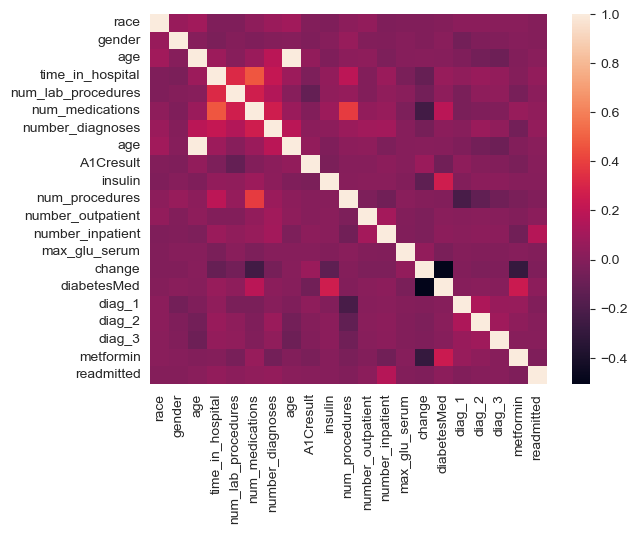

In [10]:
absolute_correlations = df.corr()['readmitted'].abs()
# print(absolute_correlations)

features_index = np.where(absolute_correlations > 0.2)
features_index = np.array(features_index).tolist()[0]
print(features_index)

features = df.columns.values[features_index]
print(features)

sns.heatmap(df.corr(), annot=False)

In [11]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor
#
# def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(val_X)
#     mae = mean_absolute_error(val_y, preds_val)
#     return(mae)

# # compare MAE with differing values of max_leaf_nodes
# for max_leaf_nodes in [5, 50, 500, 5000]:
#     my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

# from sklearn.ensemble import RandomForestRegressor
# # Define the model. Set random_state to 1
# rf_model = RandomForestRegressor(random_state = 1)
# # fit your model
# rf_model.fit(train_X, train_y)
# # Calculate the mean absolute error of your Random Forest model on the validation data
# rf_val_mae = mean_absolute_error(val_y, rf_model.predict(val_X))
# print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))
# # Check your answer
# step_1.check()

## 4. Documentation and Presentation